# Introduction to Data Visualization with Matplotlib

## Plotting time-series


O que vamos aprender?
- Colocar dois grafico que tem eixo y distinto 
- Colocar uma nota no grafico 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#  Estamos passsando dessa forma para facilatar no grafico de forma de aparece 
climate_change = pd.read_csv('../datasets/climate_change.csv', parse_dates=["date"], index_col="date")

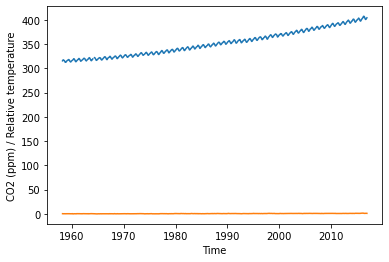

In [6]:
# Repare que no grafico não esta legal pois estamos compartilhando o mesmo eixo y,
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"])
ax.plot(climate_change.index, climate_change["relative_temp"])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm) / Relative temperature')
plt.show()

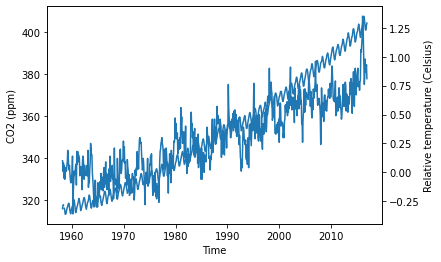

In [7]:
# Mesmo "grafico", só com eixo y independente, para isso estamos usando twinx
# ainda não esta legal pois esta tudo azul e nos não sabemos se lado direito ou esquerdo quam grafico que representa
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change["relative_temp"])
ax2.set_ylabel('Relative temperature (Celsius)')
plt.show()

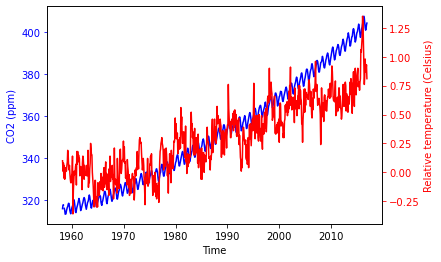

In [8]:
# Resolvemos as cores representa confome o eixo do y correspondente
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"],
color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()
ax2.plot(climate_change.index,
climate_change["relative_temp"],
color='red')
ax2.set_ylabel('Relative temperature (Celsius)',
color='red')
ax2.tick_params('y', colors='red')
plt.show()

# Refatorando ate aque foi visto nesse momento 


Vamos criar uma função para chamar para fazer refatorando 

In [9]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

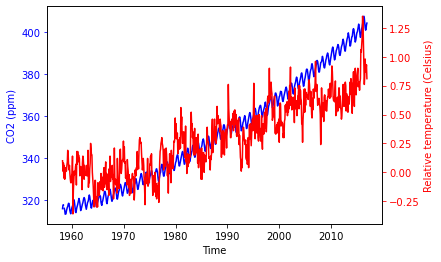

In [10]:
# Chamando pela função 
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')
plt.show()


# Annotation (nota
Serve para colocar nota, repare no annotate

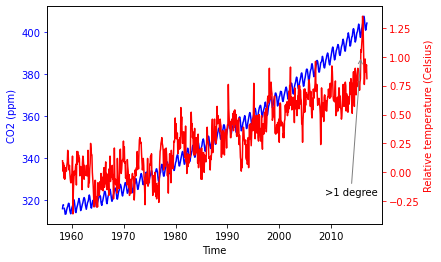

In [11]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],
'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,
climate_change['relative_temp'],
'red', 'Time', 'Relative temperature (Celsius)')
ax2.annotate(">1 degree",
xy=(pd.Timestamp('2015-10-06'), 1),
xytext=(pd.Timestamp('2008-10-06'), -0.2),
arrowprops={"arrowstyle":"->", "color":"gray"})
plt.show()

Fim: esta 100% finalizado 